# Project

## Modules Import

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb


## Loading Datasets

In [2]:
FILENAME= "calendar.csv"
DATADIR = "../rohlik_project/csv/"

calendar_df = pd.read_csv(DATADIR + FILENAME, header=0)

In [3]:
FILENAME= "inventory.csv"
DATADIR = "../rohlik_project/csv/"

inventory_df = pd.read_csv(DATADIR + FILENAME, header=0)

In [4]:
FILENAME= "sales_test.csv"
DATADIR = "../rohlik_project/csv/"

sales_test_df = pd.read_csv(DATADIR + FILENAME, header=0)

In [5]:
FILENAME= "sales_train.csv"
DATADIR = "../rohlik_project/csv/"

sales_train_df = pd.read_csv(DATADIR + FILENAME, low_memory=False)

In [6]:
FILENAME= "solution.csv"
DATADIR = "../rohlik_project/csv/"

solution_df = pd.read_csv(DATADIR + FILENAME)

In [7]:
FILENAME= "test_weights.csv"
DATADIR = "../rohlik_project/csv/"

test_weights_df = pd.read_csv(DATADIR + FILENAME)

## Information about datasets

##### calendar_df

In [8]:
calendar_df.head()

,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse
0,2022-03-16,NaN,0,0,0,0,Frankfurt_1
1,2020-03-22,NaN,0,0,0,0,Frankfurt_1
2,2018-02-07,NaN,0,0,0,0,Frankfurt_1
3,2018-08-10,NaN,0,0,0,0,Frankfurt_1
4,2017-10-26,NaN,0,0,0,0,Prague_2


In [9]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23016 entries, 0 to 23015
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    23016 non-null  object
 1   holiday_name            930 non-null    object
 2   holiday                 23016 non-null  int64 
 3   shops_closed            23016 non-null  int64 
 4   winter_school_holidays  23016 non-null  int64 
 5   school_holidays         23016 non-null  int64 
 6   warehouse               23016 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.2+ MB


In [10]:
display(calendar_df.date.min())
display(calendar_df.date.max())

'2016-01-01'

'2024-12-31'

The earliest and the latest date in the dataset.

##### inventory_df

In [11]:
inventory_df.head()

,unique_id,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,warehouse
0,5255,2583,Pastry_196,Bakery,Bakery_L2_14,Bakery_L3_26,Bakery_L4_1,Prague_3
1,4948,2426,Herb_19,Fruit and vegetable,Fruit and vegetable_L2_30,Fruit and vegetable_L3_86,Fruit and vegetable_L4_1,Prague_3
2,2146,1079,Beet_2,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_65,Fruit and vegetable_L4_34,Prague_1
3,501,260,Chicken_13,Meat and fish,Meat and fish_L2_13,Meat and fish_L3_27,Meat and fish_L4_5,Prague_1
4,4461,2197,Chicory_1,Fruit and vegetable,Fruit and vegetable_L2_17,Fruit and vegetable_L3_33,Fruit and vegetable_L4_1,Frankfurt_1


In [12]:
inventory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5432 entries, 0 to 5431
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   unique_id            5432 non-null   int64 
 1   product_unique_id    5432 non-null   int64 
 2   name                 5432 non-null   object
 3   L1_category_name_en  5432 non-null   object
 4   L2_category_name_en  5432 non-null   object
 5   L3_category_name_en  5432 non-null   object
 6   L4_category_name_en  5432 non-null   object
 7   warehouse            5432 non-null   object
dtypes: int64(2), object(6)
memory usage: 339.6+ KB


#### sales_train_df

In [13]:
sales_train_df.head()

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
0,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,1.00,0.00000,0.0,0.0,0.0,0.15312,0.0,0.0
1,4845,2021-05-25,Budapest_1,4663.0,12.63,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
2,4845,2021-12-20,Budapest_1,6507.0,34.55,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
3,4845,2023-04-29,Budapest_1,5463.0,34.52,646.26,0.96,0.20024,0.0,0.0,0.0,0.15312,0.0,0.0
4,4845,2022-04-01,Budapest_1,5997.0,35.92,486.41,1.00,0.00000,0.0,0.0,0.0,0.15649,0.0,0.0


In [14]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   unique_id        1048575 non-null  int64  
 1   date             1048575 non-null  object 
 2   warehouse        1048575 non-null  object 
 3   total_orders     1048556 non-null  float64
 4   sales            1048556 non-null  float64
 5   sell_price_main  1048575 non-null  float64
 6   availability     1048575 non-null  float64
 7   type_0_discount  1048575 non-null  float64
 8   type_1_discount  1048575 non-null  float64
 9   type_2_discount  1048575 non-null  float64
 10  type_3_discount  1048575 non-null  float64
 11  type_4_discount  1048575 non-null  float64
 12  type_5_discount  1048575 non-null  float64
 13  type_6_discount  1048575 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 112.0+ MB


In [15]:
display(sales_train_df.date.min())
display(sales_train_df.date.max())

'2020-08-01'

'2024-06-02'

The earliest and the latest date in the dataset.

#### sales_test_df

In [16]:
sales_test_df.head(15)

,unique_id,date,warehouse,total_orders,sell_price_main,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
0,1226,2024-06-03,Brno_1,8679.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,1226,2024-06-11,Brno_1,8795.0,13.13,0.15873,0.0,0.0,0.0,0.0,0.0,0.0
2,1226,2024-06-13,Brno_1,10009.0,13.13,0.15873,0.0,0.0,0.0,0.0,0.0,0.0
3,1226,2024-06-15,Brno_1,8482.0,13.13,0.15873,0.0,0.0,0.0,0.0,0.0,0.0
4,1226,2024-06-09,Brno_1,8195.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
5,1226,2024-06-06,Brno_1,9538.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
6,1226,2024-06-12,Brno_1,9002.0,13.13,0.15873,0.0,0.0,0.0,0.0,0.0,0.0
7,1226,2024-06-05,Brno_1,8501.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
8,1226,2024-06-04,Brno_1,8492.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
9,1226,2024-06-08,Brno_1,8093.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
sales_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47021 entries, 0 to 47020
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unique_id        47021 non-null  int64  
 1   date             47021 non-null  object 
 2   warehouse        47021 non-null  object 
 3   total_orders     47021 non-null  float64
 4   sell_price_main  47021 non-null  float64
 5   type_0_discount  47021 non-null  float64
 6   type_1_discount  47021 non-null  float64
 7   type_2_discount  47021 non-null  float64
 8   type_3_discount  47021 non-null  float64
 9   type_4_discount  47021 non-null  float64
 10  type_5_discount  47021 non-null  float64
 11  type_6_discount  47021 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 4.3+ MB


In [18]:
display(sales_test_df.date.min())
display(sales_test_df.date.max())

'2024-06-03'

'2024-06-16'

 The earliest and the latest date in the dataset.

##### solution_df

In [19]:
solution_df.head(5)

,id,sales_hat
0,Brno_1_1226_2024-06-03,242.320371
1,Brno_1_1226_2024-06-11,232.836769
2,Brno_1_1226_2024-06-13,255.140114
3,Brno_1_1226_2024-06-15,233.518247
4,Brno_1_1226_2024-06-09,227.516824


In [20]:
solution_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47021 entries, 0 to 47020
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         47021 non-null  object 
 1   sales_hat  47021 non-null  float64
dtypes: float64(1), object(1)
memory usage: 734.8+ KB


##### test_weight_df

In [21]:
test_weights_df.head(5)

,unique_id,weight
0,0,2.535369
1,1,3.888933
2,2,5.885237
3,3,2.139552
4,5,3.021715


In [22]:
test_weights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5390 entries, 0 to 5389
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   unique_id  5390 non-null   int64  
 1   weight     5390 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 84.3 KB


## Explanatory Data Analysis

In [23]:
# Merging
data = sales_train_df.merge(calendar_df, on='date', how='left').merge(inventory_df, on='unique_id', how='left')
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7340025 entries, 0 to 7340024
Data columns (total 27 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   unique_id               int64  
 1   date                    object 
 2   warehouse_x             object 
 3   total_orders            float64
 4   sales                   float64
 5   sell_price_main         float64
 6   availability            float64
 7   type_0_discount         float64
 8   type_1_discount         float64
 9   type_2_discount         float64
 10  type_3_discount         float64
 11  type_4_discount         float64
 12  type_5_discount         float64
 13  type_6_discount         float64
 14  holiday_name            object 
 15  holiday                 int64  
 16  shops_closed            int64  
 17  winter_school_holidays  int64  
 18  school_holidays         int64  
 19  warehouse_y             object 
 20  product_unique_id       int64  
 21  name                    object 

None

In [24]:
# Dropping redundant column
data=data.drop(columns=['warehouse_y', 'warehouse_x'])
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7340025 entries, 0 to 7340024
Data columns (total 25 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   unique_id               int64  
 1   date                    object 
 2   total_orders            float64
 3   sales                   float64
 4   sell_price_main         float64
 5   availability            float64
 6   type_0_discount         float64
 7   type_1_discount         float64
 8   type_2_discount         float64
 9   type_3_discount         float64
 10  type_4_discount         float64
 11  type_5_discount         float64
 12  type_6_discount         float64
 13  holiday_name            object 
 14  holiday                 int64  
 15  shops_closed            int64  
 16  winter_school_holidays  int64  
 17  school_holidays         int64  
 18  product_unique_id       int64  
 19  name                    object 
 20  L1_category_name_en     object 
 21  L2_category_name_en     object 

None

In [25]:
# Data Cleaning and Feature Engineering
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Add 'year' and 'month' columns
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['day_of_week'] = pd.to_datetime(data['date']).dt.dayofweek
data['weekend'] = data['day_of_week'].isin([5, 6]).astype(int)
data['holiday'] = data['holiday'].fillna(0).astype(int)

# Changing integer values to string
data['day_of_week'] = data['day_of_week'].astype('string')
data['holiday'] = data['holiday'].astype('string')

# Changing numbers to day of week names, weekend, and holiday
day_map = {'0': 'Monday','1': 'Tuesday', '2': 'Wednesday', '3': 'Thursday', '4': 'Friday', '5': 'Saturday', '6': 'Sunday'}
data['day_of_week'] = data['day_of_week'].map(day_map)
holiday_map={'0': 'Not  a Holiday', '1':'Holiday'}
data['holiday'] = data['holiday'].map(holiday_map)

# Set date as index of dataframe
# data.set_index('date', inplace=True)


#### Summary daily sales

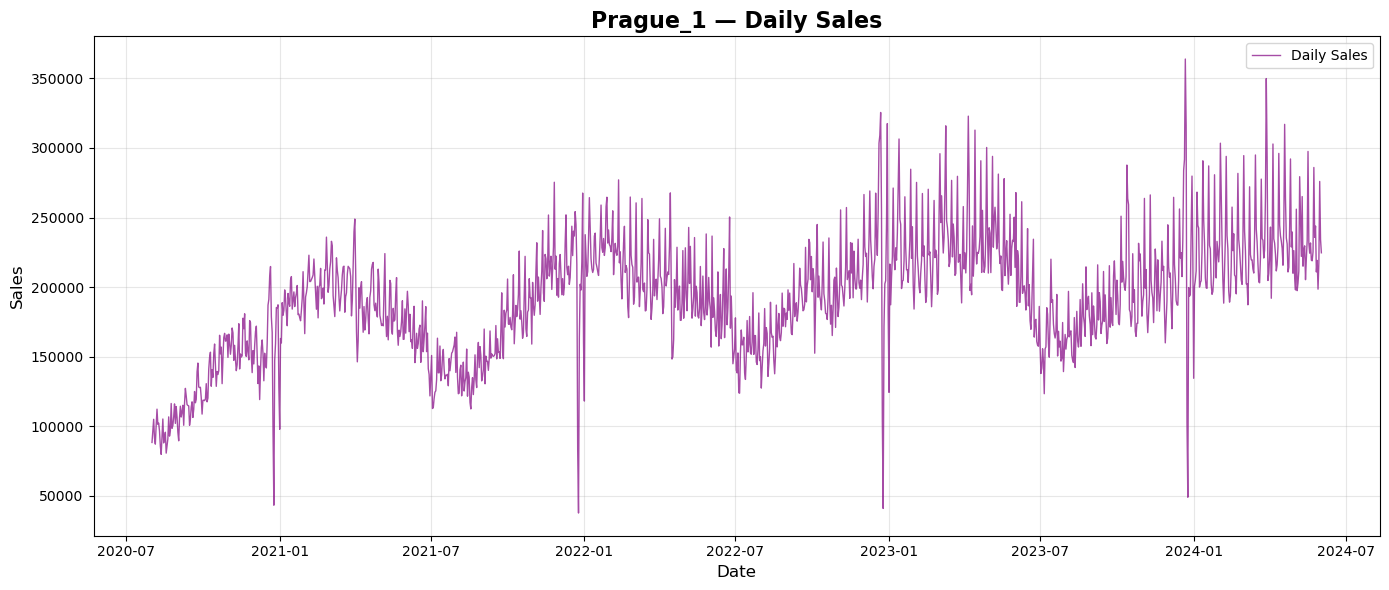

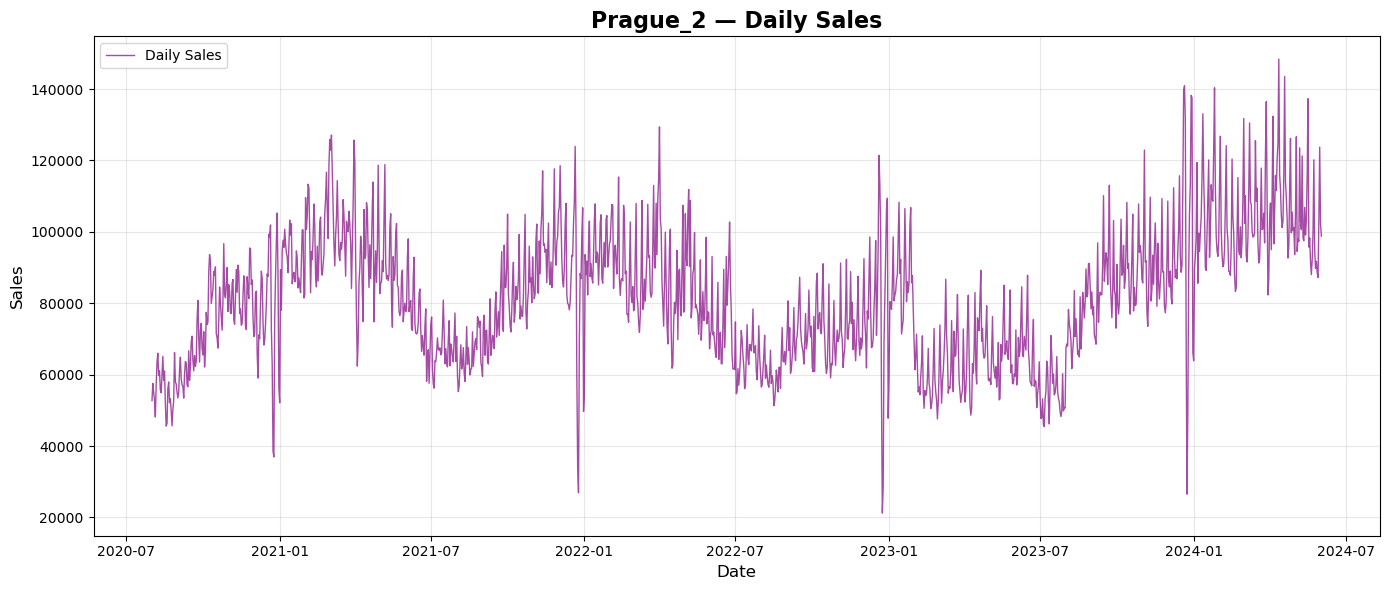

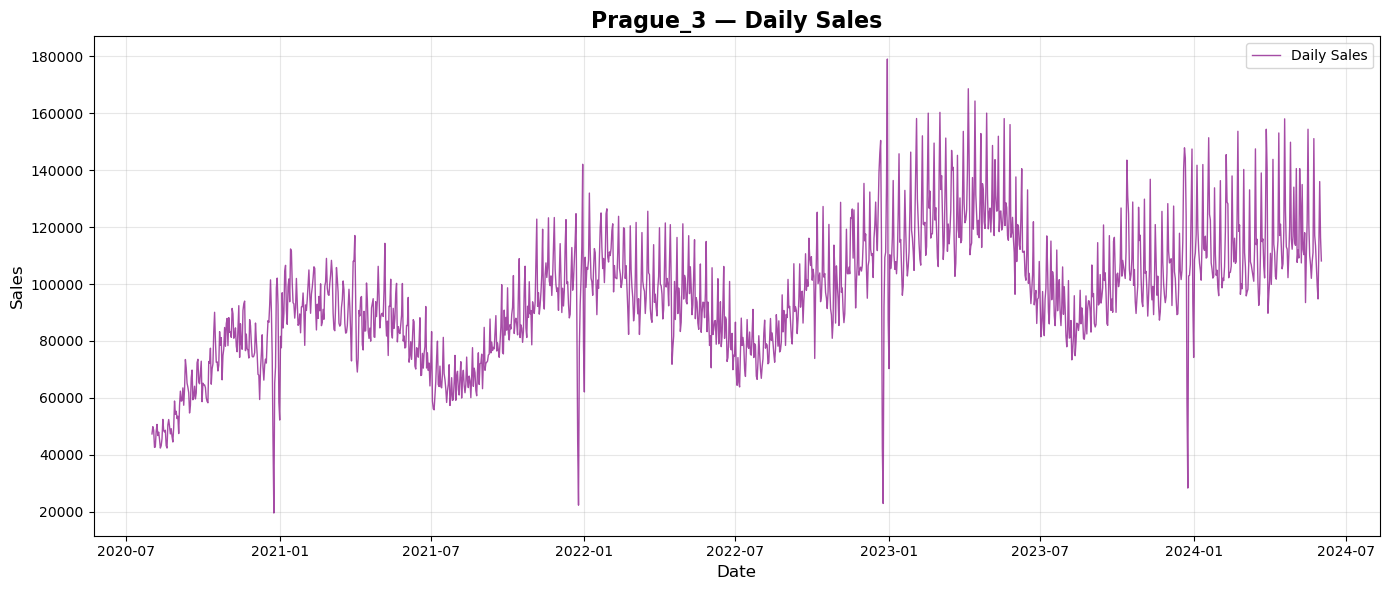

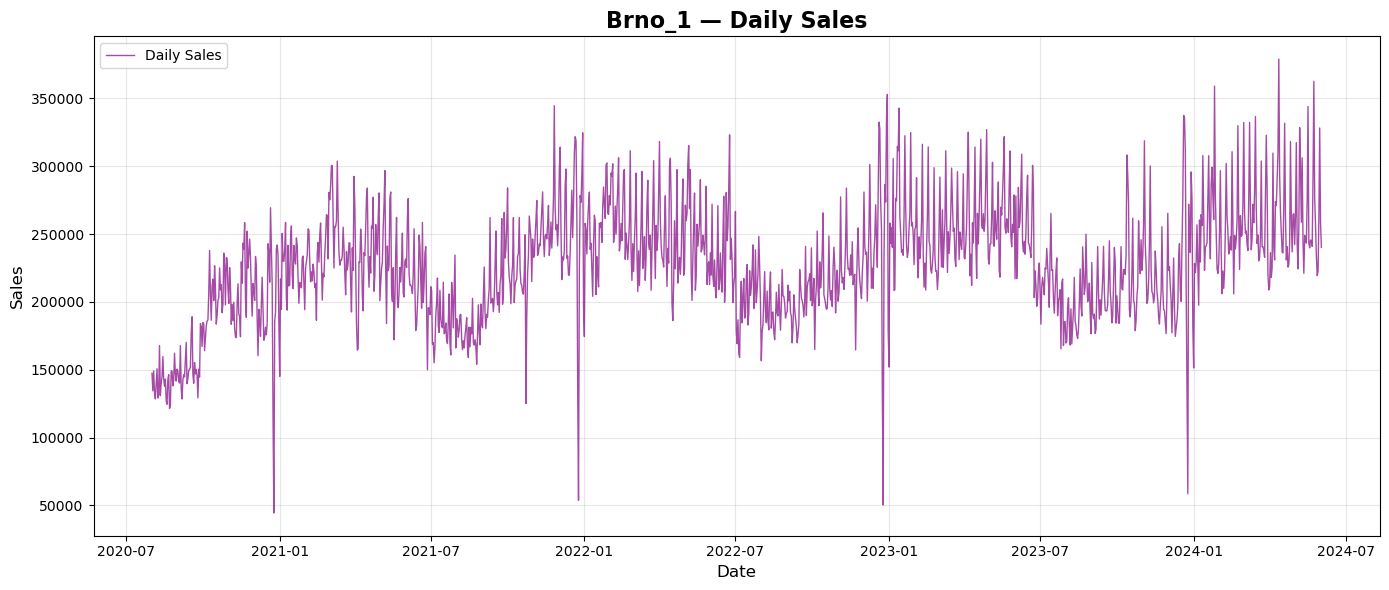

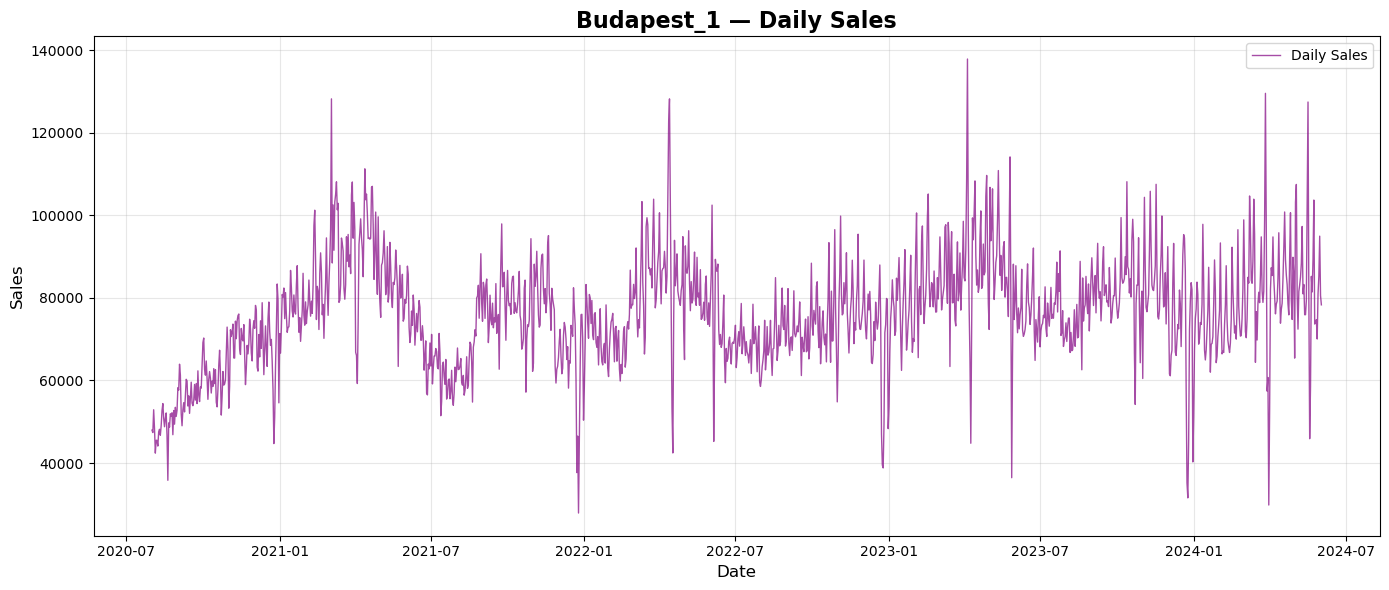

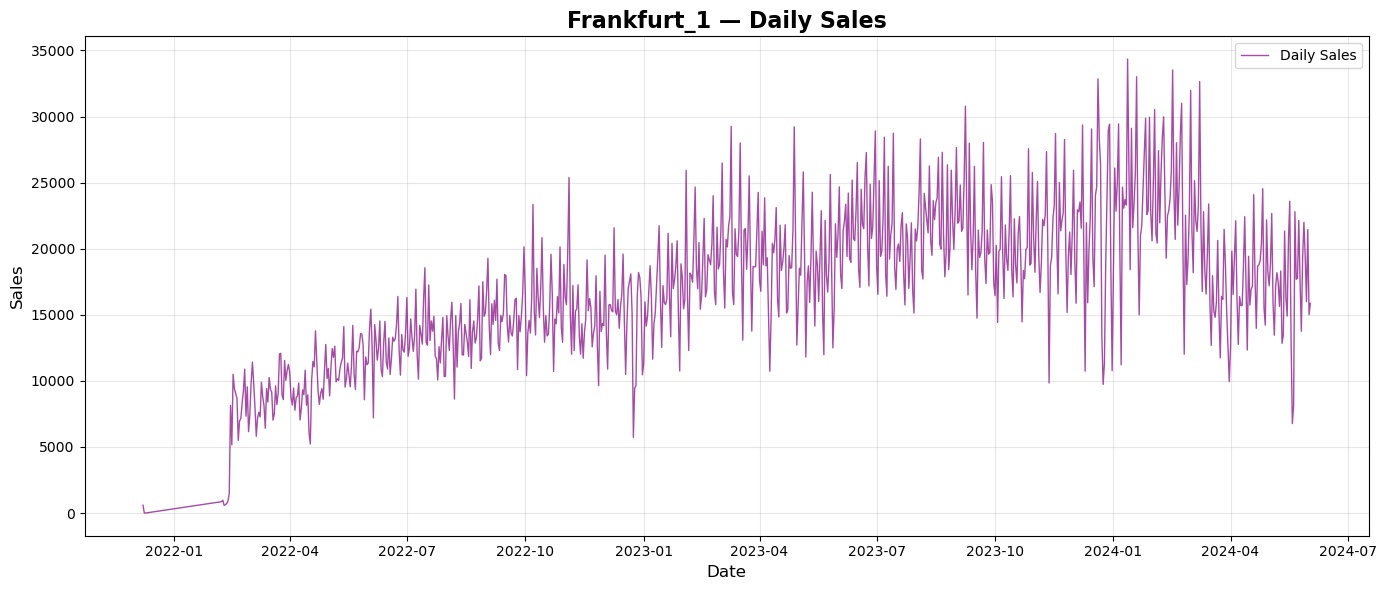

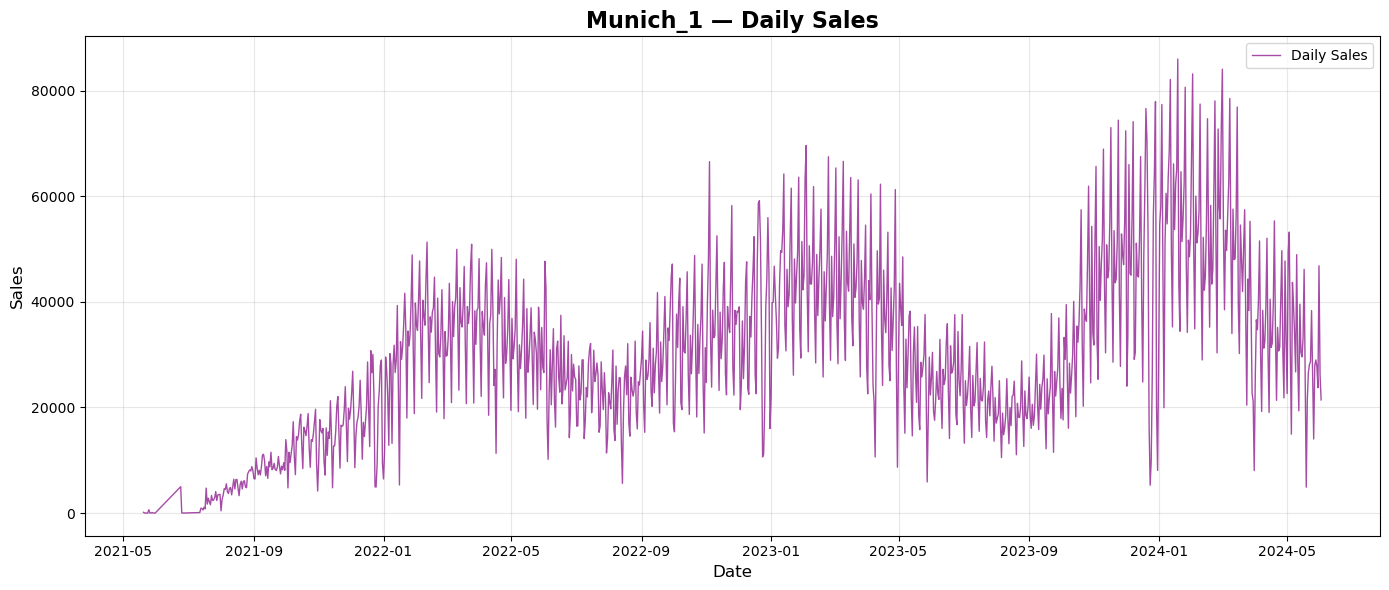

In [26]:

# Group by date and warehouse, sum sales, reset index right away
ds = (data.groupby(["date", "warehouse"], as_index=False).agg(sales=("sales", "sum")).sort_values(["warehouse", "date"])
)

warehouses = ["Prague_1", "Prague_2", "Prague_3", "Brno_1",
              "Budapest_1", "Frankfurt_1", "Munich_1"]


ds["date"] = pd.to_datetime(ds["date"])

# Plot each warehouse
for wh in warehouses:
    df_wh = ds[ds["warehouse"] == wh]
    if df_wh.empty:
        print(f"⚠️ No data for {wh}")
        continue

    plt.figure(figsize=(14, 6))
    plt.plot(df_wh["date"], df_wh["sales"],
             label="Daily Sales", linewidth=1.0, color="purple", alpha=0.7)
    plt.title(f"{wh} — Daily Sales", fontsize=16, weight="bold")
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Sales", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()




In [27]:
ds.head()

,date,warehouse,sales
0,2020-08-01,Brno_1,147396.27
5,2020-08-02,Brno_1,134427.58
10,2020-08-03,Brno_1,149112.67
15,2020-08-04,Brno_1,133365.47
20,2020-08-05,Brno_1,128492.28


Prague and Brno are both in Czech Republic. Summary sales show simmilar repeated pattern of sales during every year with tendency to grow every year.
Budapest is the capital of Hungary. Summary sales plot shows again repeated pattern of sales over years, but a bit different than plots from Czech Republic. There seems to be no tendency of growth over the years.
City of Munich is in Germany. Plot of summary daily sales shows again repeated pattern of sales over every year with tendency to grow each year.
City of Munich is in Germany. Plot of summary daily sales does not seems to show repeated pattern of sales over every year with tendency to grow each year.

#### Average sales during weekdays

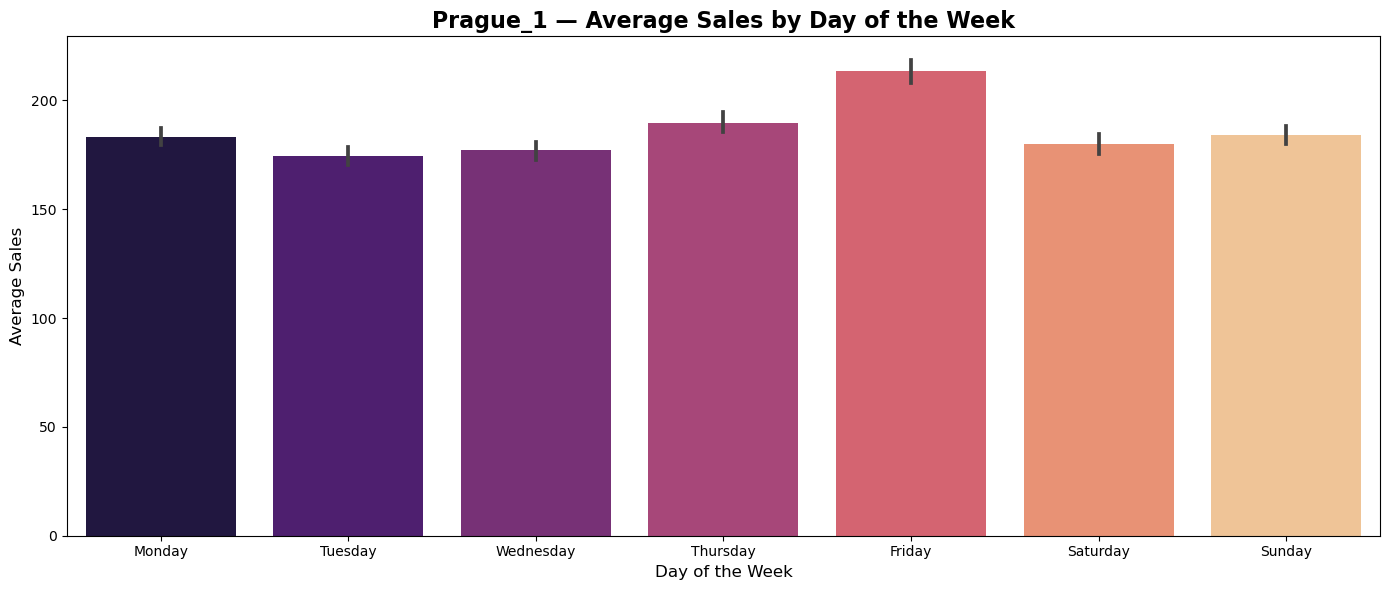

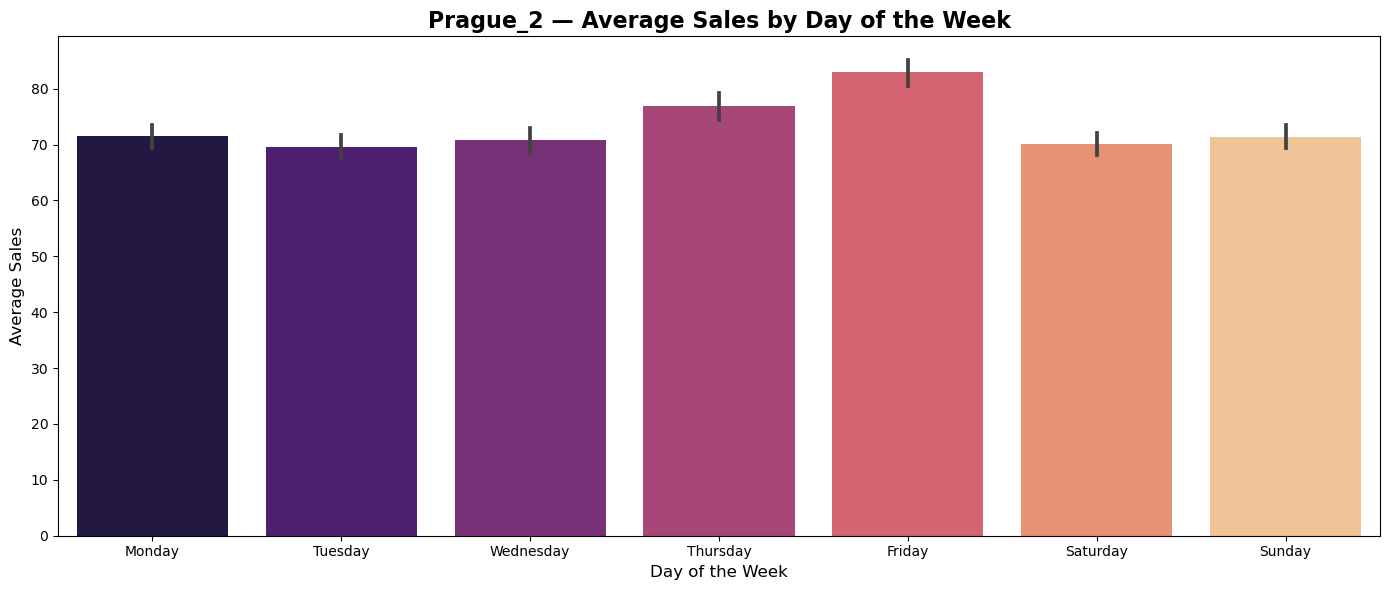

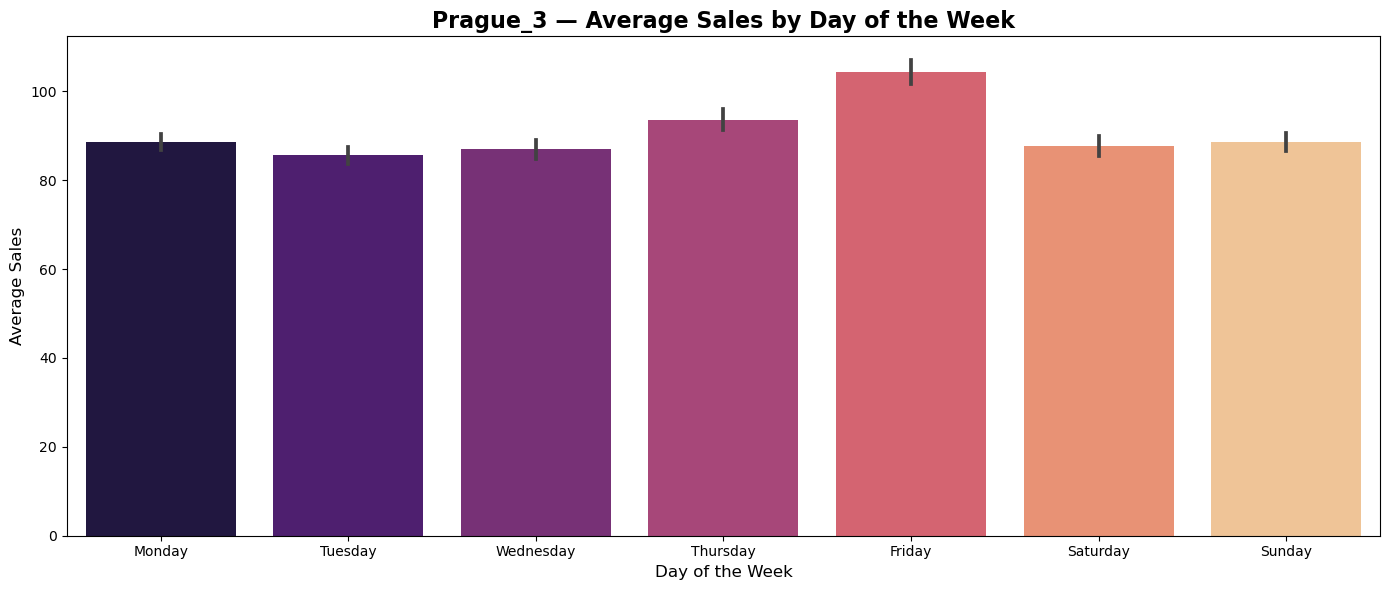

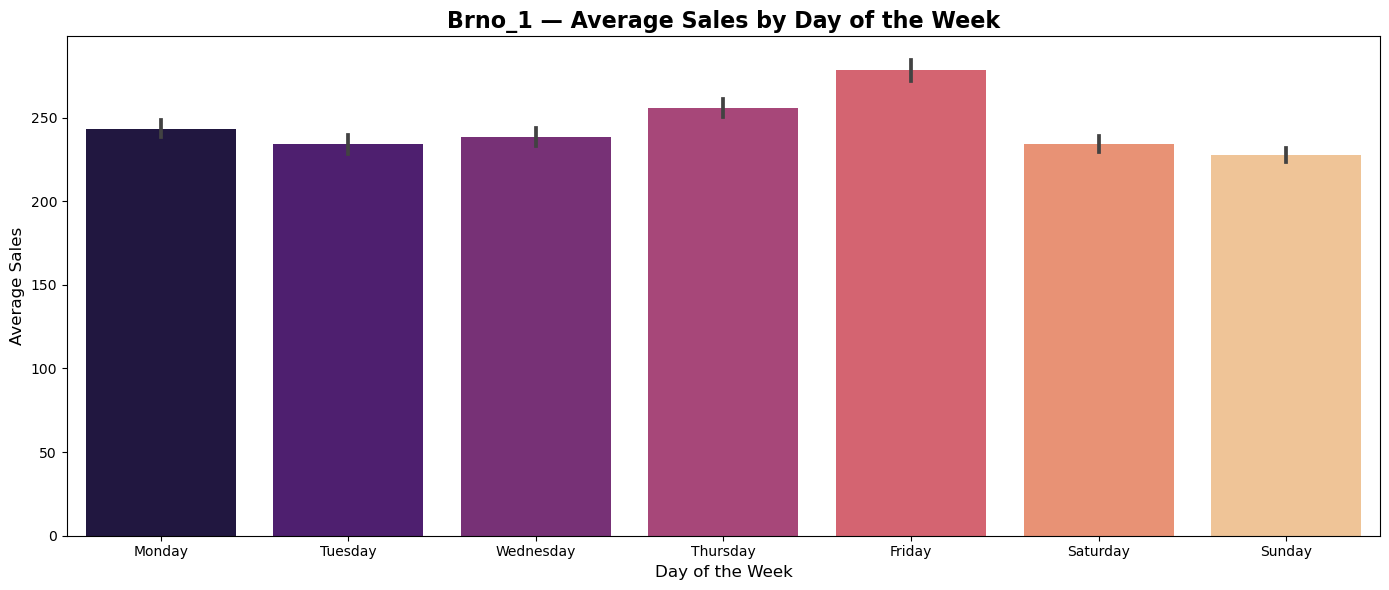

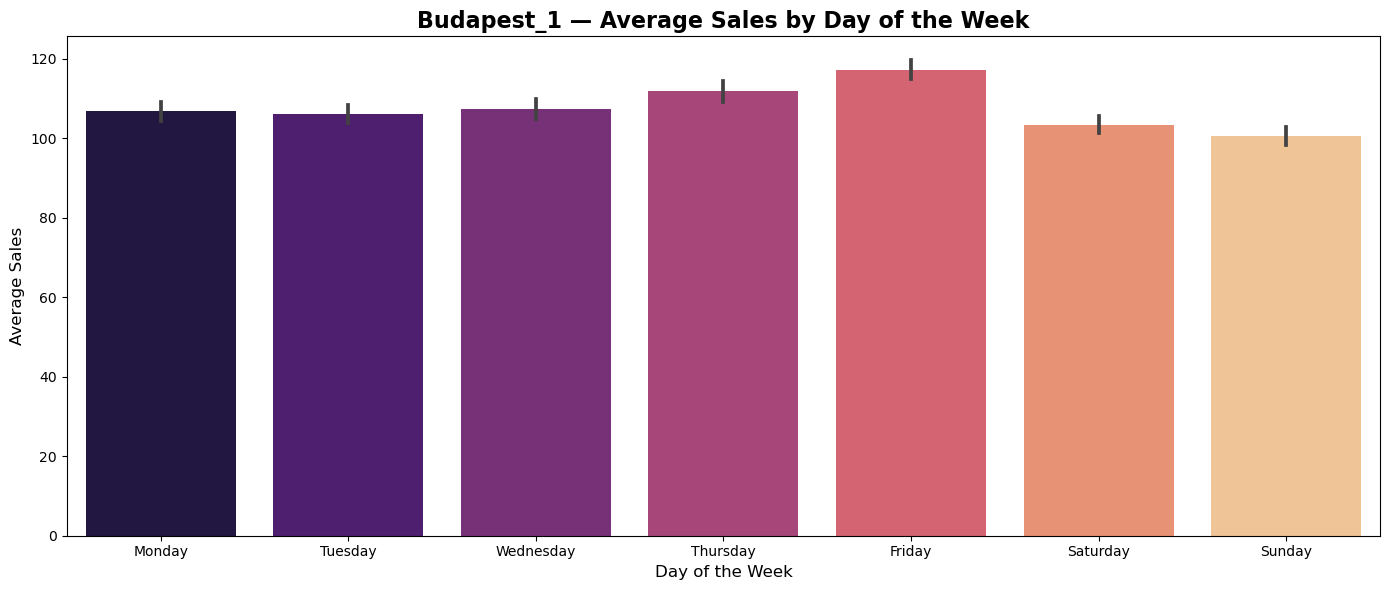

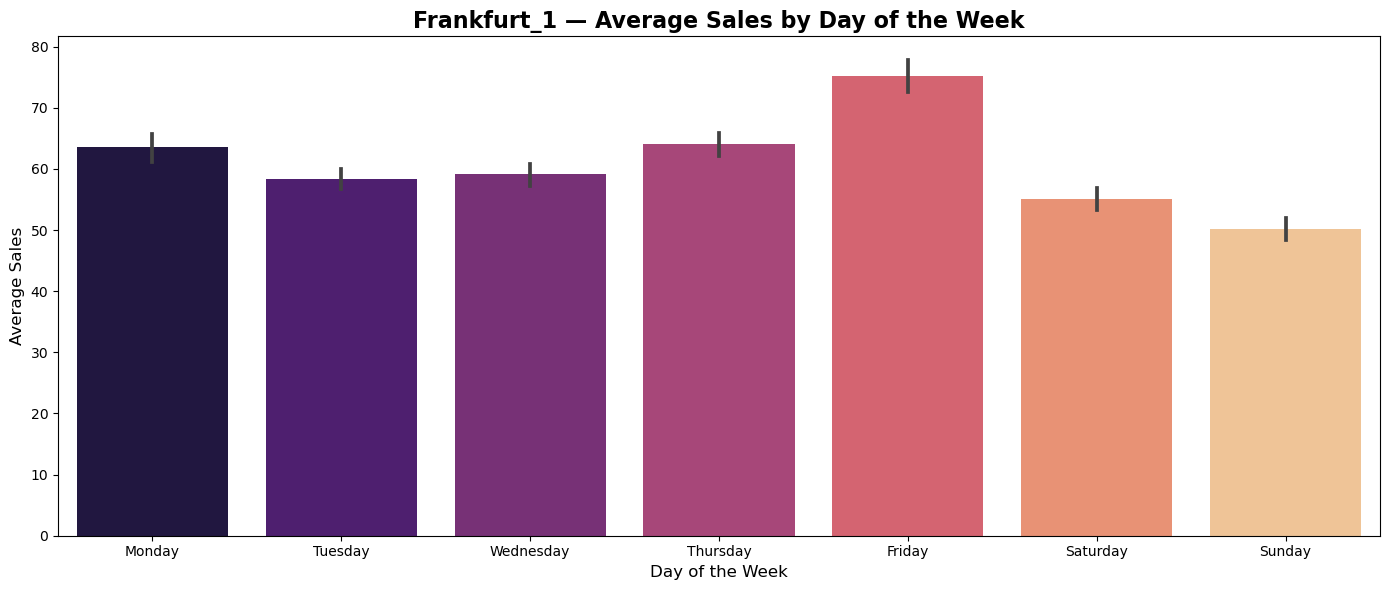

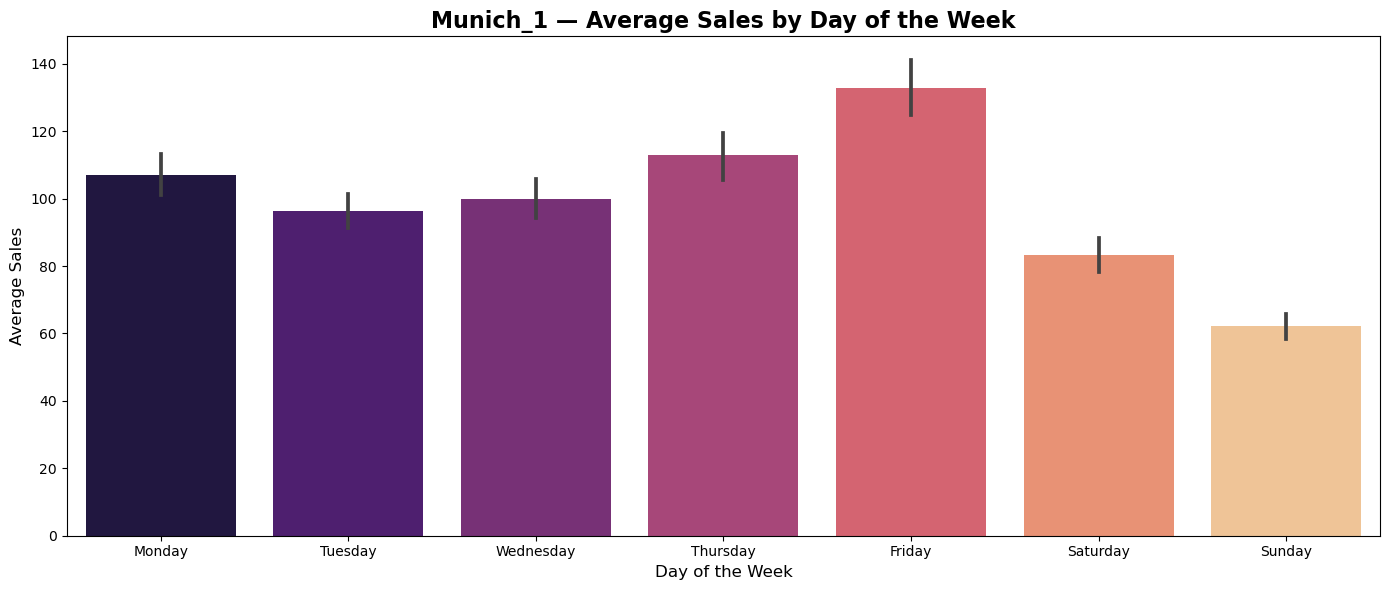

In [28]:
week_average=data.groupby(['date', 'warehouse']).agg({'sales':'mean', 'day_of_week':'first', 'warehouse':'first'})

for wh in warehouses:
        df_wh = week_average[week_average['warehouse'] == wh]

        fig, ax = plt.subplots(figsize=(14, 6))
        sns.barplot(x='day_of_week', y='sales', data=df_wh, ax=ax, palette='magma', order=('Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'))

        ax.set_title(f"{wh} — Average Sales by Day of the Week", fontsize=16, weight='bold')
        ax.set_xlabel("Day of the Week", fontsize=12)
        ax.set_ylabel("Average Sales", fontsize=12)
        plt.tight_layout()
        plt.show()


Plots of average sales during weekdays shows tendency of custumers in all countries to do shopping on Thurdays and Fridays.

#### Average monthly sales

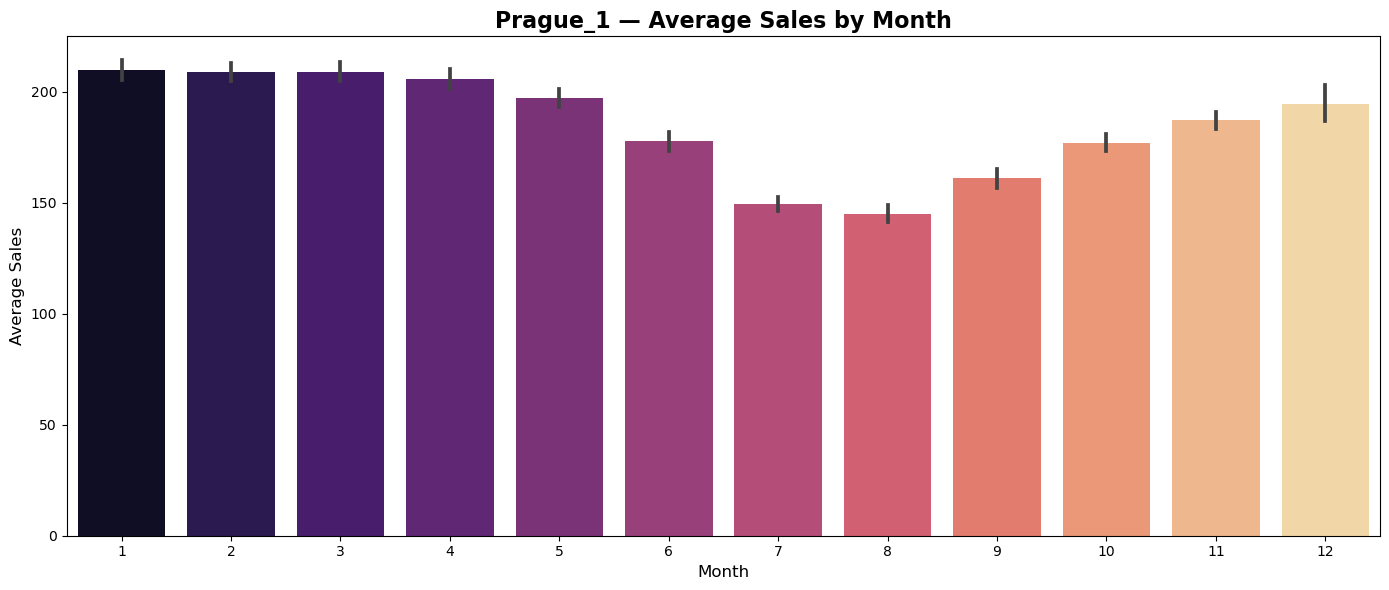

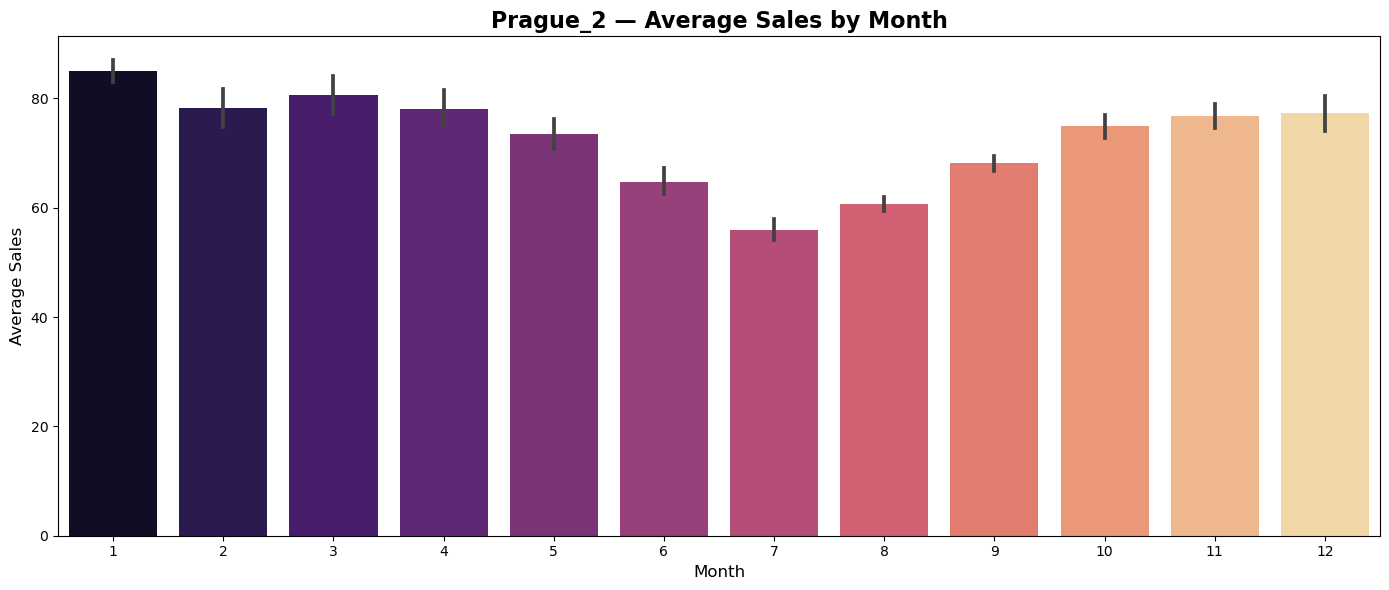

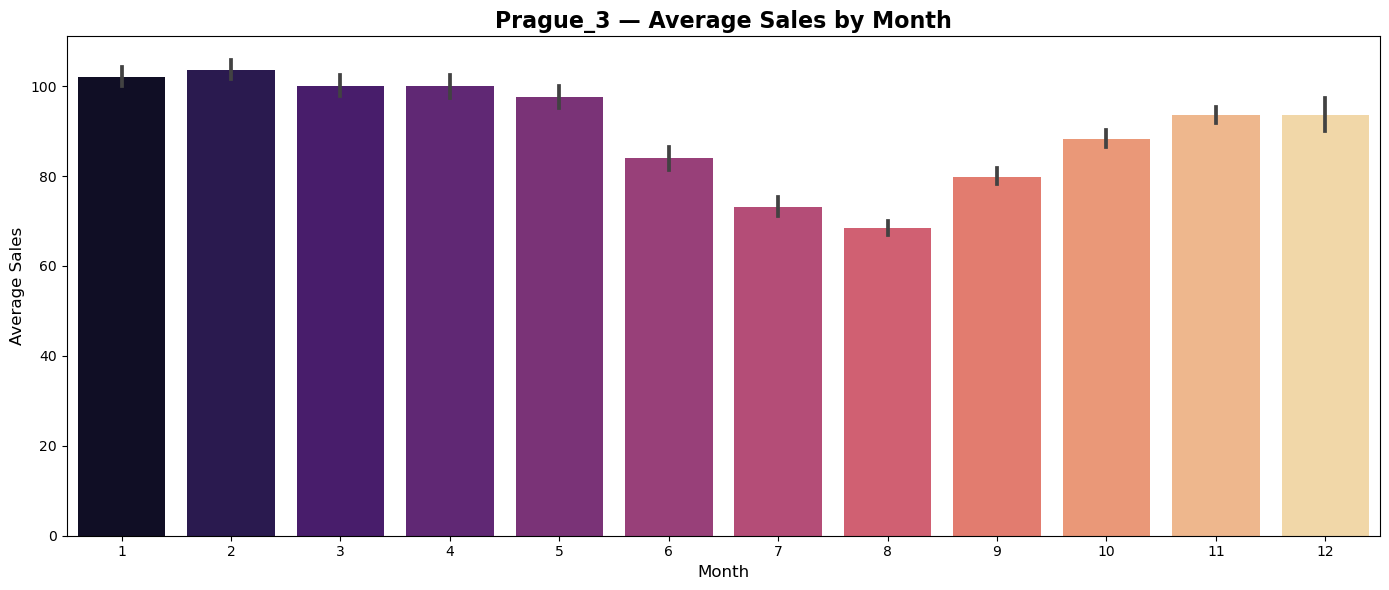

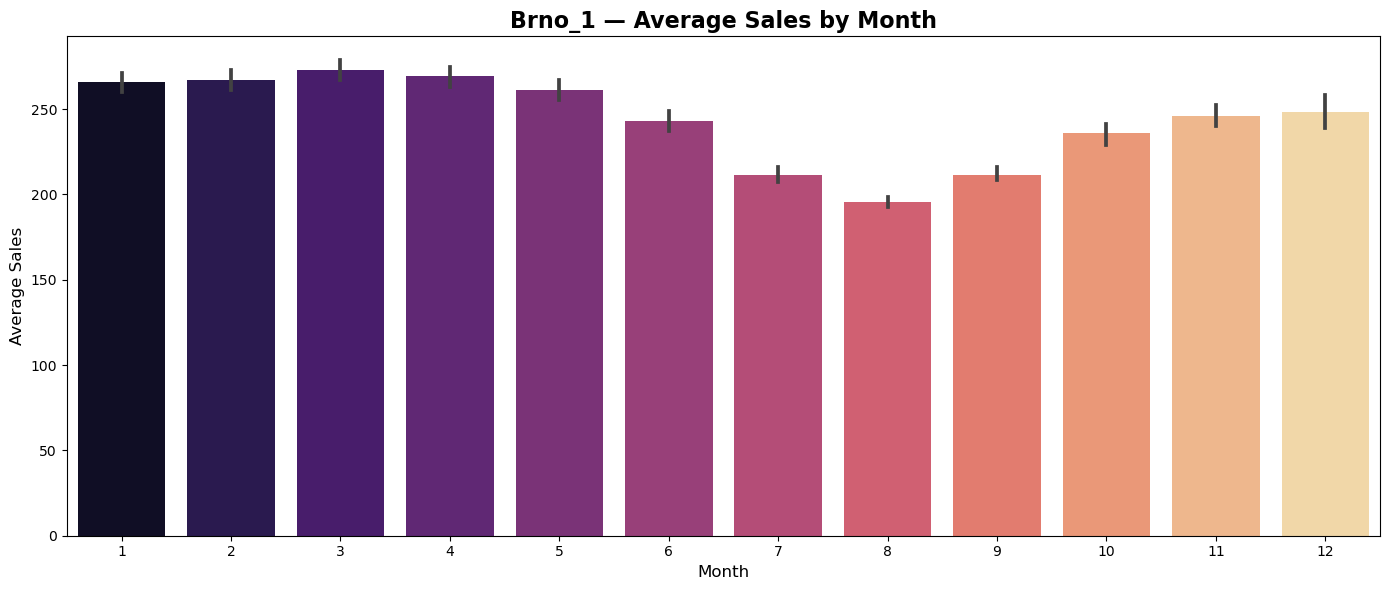

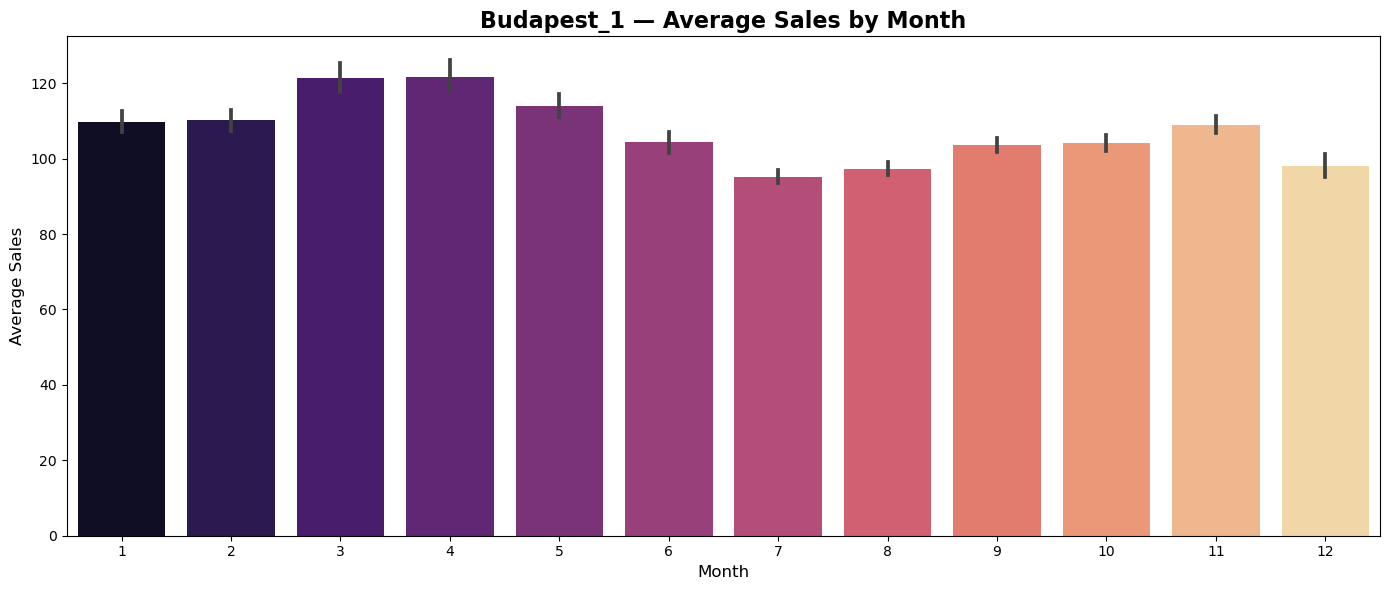

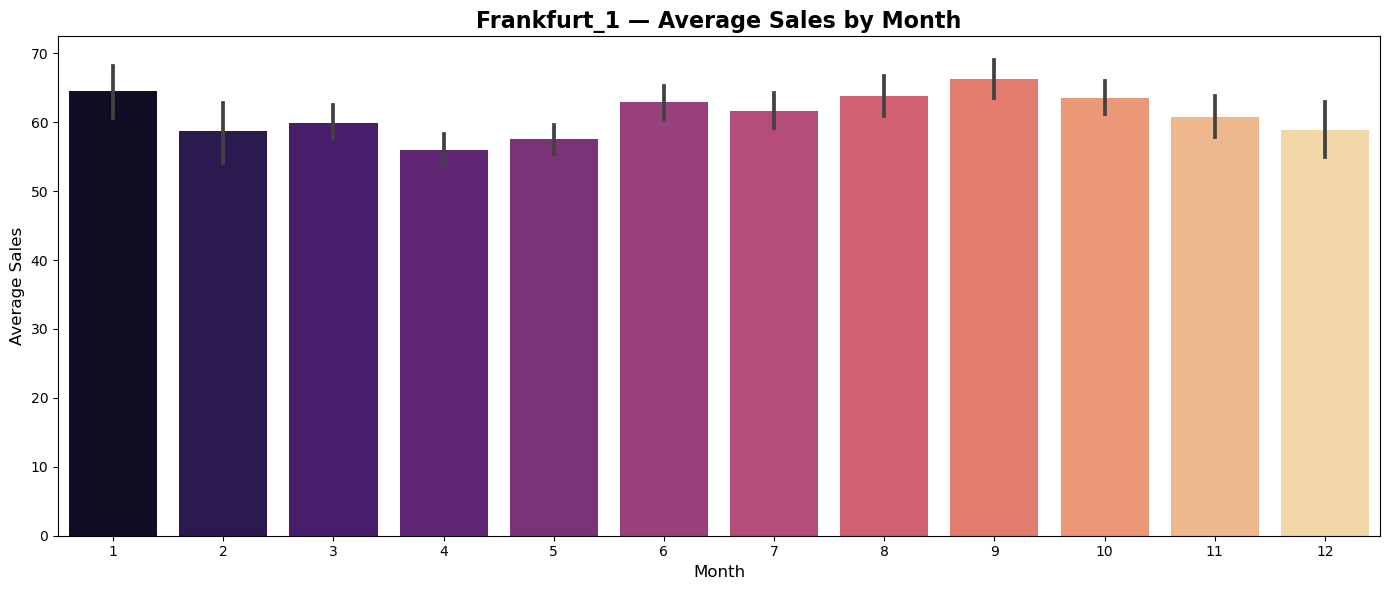

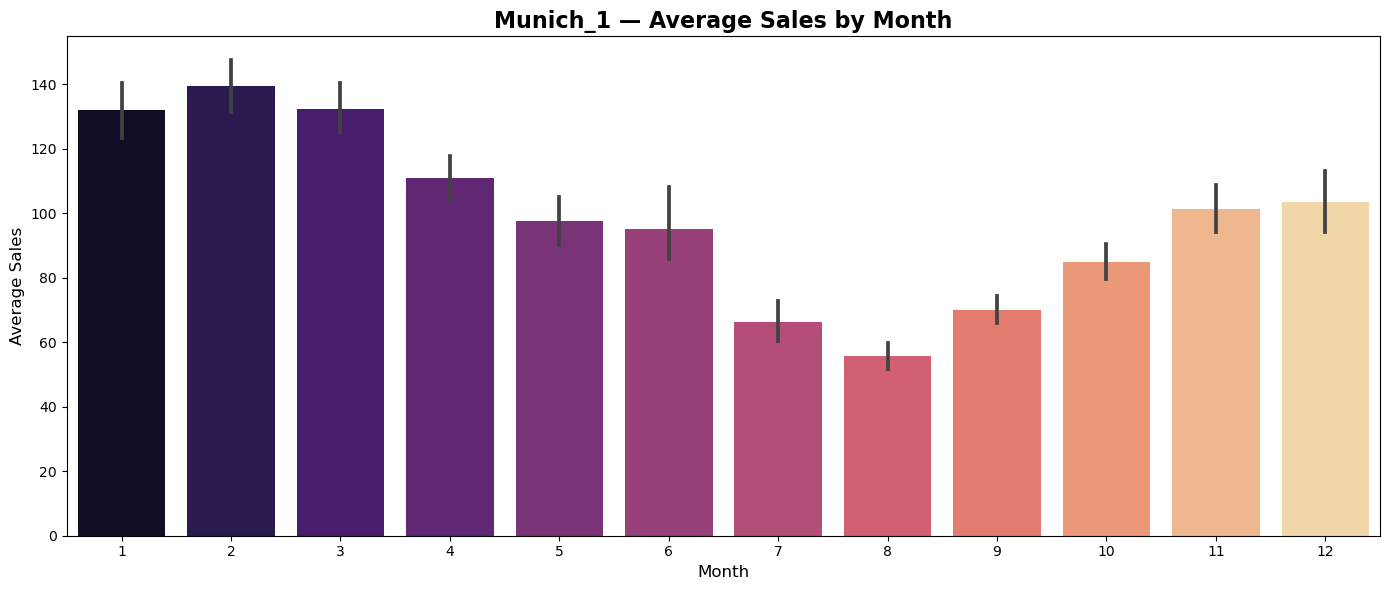

In [29]:
monthly_average=data.groupby(['date', 'warehouse']).agg({'sales':'mean', 'month':'first', 'warehouse':'first'})

for wh in warehouses:
        df_wh = monthly_average[monthly_average['warehouse'] == wh]

        fig, ax = plt.subplots(figsize=(14, 6))
        sns.barplot(x='month', y='sales', data=df_wh, ax=ax, palette='magma', order=range(1,13))

        ax.set_title(f"{wh} — Average Sales by Month", fontsize=16, weight='bold')
        ax.set_xlabel("Month", fontsize=12)
        ax.set_ylabel("Average Sales", fontsize=12)
        plt.tight_layout()
        plt.show()


Plots of average monthly sales seems to reflect regionally differences in shopping habits of customers.

#### Average sales during holidays and common days

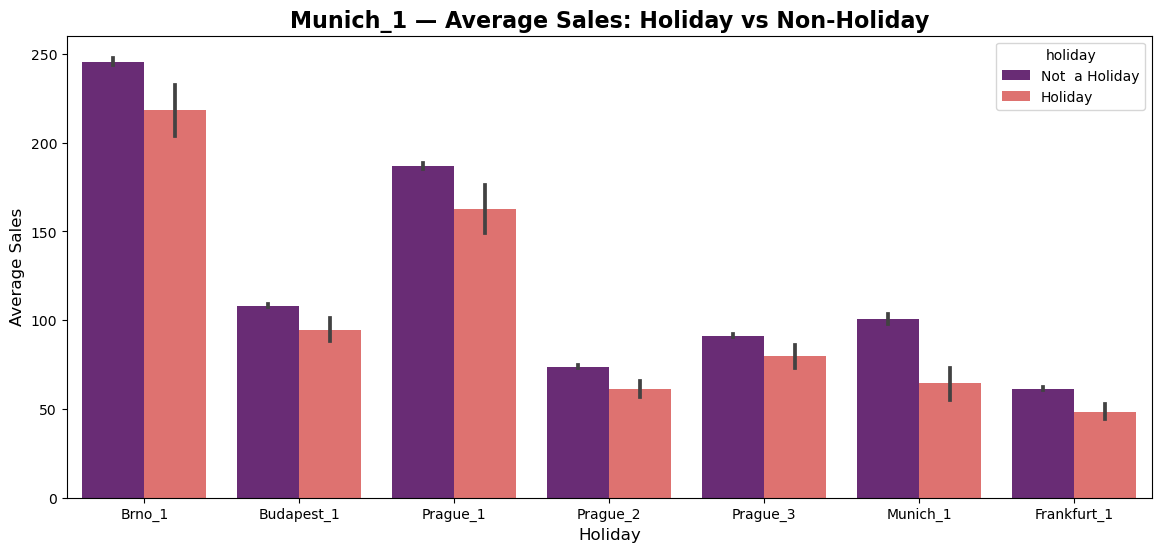

In [30]:
avg_holiday_sales=data.groupby(['date', 'warehouse']).agg({'sales':'mean', 'holiday':'first', 'holiday_name':'first', 'warehouse':'first'})


fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(x='warehouse', y='sales', hue='holiday', data=avg_holiday_sales, palette='magma')

ax.set_title(f"{wh} — Average Sales: Holiday vs Non-Holiday", fontsize=16, weight='bold')
ax.set_xlabel("Holiday", fontsize=12)
ax.set_ylabel("Average Sales", fontsize=12)
plt.show()

## Prediction

#### Data preparation

In [31]:
# sort first
data = data.sort_values(['date', 'unique_id'])

# lag features
for L in (1, 7, 14, 28):
    data[f"sales_lag_{L}"] = data.groupby("unique_id")["sales"].shift(L)

# rolling means/stds (past-only)
for W in (7, 14, 28):
    data[f"sales_roll{W}_mean"] = (
        data.groupby("unique_id")["sales"].shift(1).rolling(W).mean()
    )
    data[f"sales_roll{W}_std"] = (
        data.groupby("unique_id")["sales"].shift(1).rolling(W).std()
    )

# simple momentum signals (optional)
data["sales_mom_1_7"] = data["sales_lag_1"] - data["sales_lag_7"]


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7340025 entries, 953925 to 4088300
Data columns (total 41 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   unique_id               int64         
 1   date                    datetime64[ns]
 2   total_orders            float64       
 3   sales                   float64       
 4   sell_price_main         float64       
 5   availability            float64       
 6   type_0_discount         float64       
 7   type_1_discount         float64       
 8   type_2_discount         float64       
 9   type_3_discount         float64       
 10  type_4_discount         float64       
 11  type_5_discount         float64       
 12  type_6_discount         float64       
 13  holiday_name            object        
 14  holiday                 object        
 15  shops_closed            int64         
 16  winter_school_holidays  int64         
 17  school_holidays         int64         
 1

In [33]:
data = data.dropna()

In [34]:
H = 14
frames = []
for h in range(1, H+1):
    tmp = data.copy()
    tmp["h"] = h
    tmp["target_h"] = tmp.groupby("unique_id")["sales"].shift(-h)
    frames.append(tmp)

mh = pd.concat(frames, ignore_index=True)
mh = mh.dropna(subset=["target_h"]).reset_index(drop=True)


In [35]:

# Using weights:
wts = pd.read_csv("../rohlik_project/csv/test_weights.csv")  # unique_id, weight
mh = mh.merge(wts, on="unique_id", how="left").fillna({"weight": 1.0})

def wmape(y_true, y_pred, w=None, eps=1e-9):
    if w is None:
        return np.sum(np.abs(y_true - y_pred)) / (np.sum(np.abs(y_true)) + eps)
    return np.sum(w * np.abs(y_true - y_pred)) / (np.sum(w * np.abs(y_true)) + eps)


In [36]:
mh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4204647 entries, 0 to 4204646
Data columns (total 44 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   unique_id               int64         
 1   date                    datetime64[ns]
 2   total_orders            float64       
 3   sales                   float64       
 4   sell_price_main         float64       
 5   availability            float64       
 6   type_0_discount         float64       
 7   type_1_discount         float64       
 8   type_2_discount         float64       
 9   type_3_discount         float64       
 10  type_4_discount         float64       
 11  type_5_discount         float64       
 12  type_6_discount         float64       
 13  holiday_name            object        
 14  holiday                 object        
 15  shops_closed            int64         
 16  winter_school_holidays  int64         
 17  school_holidays         int64         
 18  pr

In [37]:
mh = mh.copy()

# Columns to label-encode
cat_cols = ['warehouse', 'day_of_week', 'holiday', 'holiday_name']

# Apply LabelEncoder to each column
for col in cat_cols:
    le = LabelEncoder()
    mh[col] = le.fit_transform(mh[col].astype(str))  # convert to string for safety

In [38]:
mh = mh.drop(columns=[
    'L1_category_name_en', 'L2_category_name_en',
    'L3_category_name_en', 'L4_category_name_en', 'name'
])

### Model and prediction

In [43]:
# feature columns: keep engineered stuff + calendar flags; drop IDs/date/targets
drop_cols = {"sales","target_h","date"}  # drop raw sales & date
id_cols = {"unique_id","warehouse"}
maybe_features = [
    c for c in mh.columns
    if c not in drop_cols | id_cols and not c.endswith("_name")
]

# keep typical useful features
features = [
    c for c in maybe_features
    if c.startswith("sales_") or c in {"holiday","shops_closed","school_holidays","winter_school_holidays",
                                       "day_of_week","month","year","h","total_orders","sell_price_main",
                                       "availability", "Sales_lag_1", "Sales_lag_7", "Sales_lag_14", "Sales_lag_28",
                                       "rolling_mean7", "rolling_std7", "rolling_mean14", "rolling_std14",
                                       "rolling_mean28", "rolling_std28", "sales_mom_1_7"} 
]

X = mh[features].copy()
y = mh["target_h"].astype(float).values
w = mh["weight"].values if "weight" in mh else None

# simple validation: last 14 days across all series
cutoff = mh["date"].max() - pd.Timedelta(days=H)
train_idx = mh["date"] < cutoff
valid_idx = mh["date"] >= cutoff

X_tr, y_tr = X[train_idx], y[train_idx]
X_va, y_va = X[valid_idx], y[valid_idx]
w_tr = w[train_idx] if w is not None else None
w_va = w[valid_idx] if w is not None else None


In [ ]:
model = lgb.LGBMRegressor(
    objective="tweedie",
    tweedie_variance_power=1.4,  
    n_estimators=1500,
    learning_rate=0.05,
    num_leaves=63,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=1337
)

# Train safely across all LightGBM versions
model.fit(
    X_tr, y_tr,
    sample_weight=w_tr,                 
    eval_set=[(X_va, y_va)],
    eval_metric="mae",
    callbacks=[lgb.log_evaluation(period=200)]  
)

pred_va = np.clip(model.predict(X_va), 0, None)  # non-negative
print("MAE  :", mean_absolute_error(y_va, pred_va))
print("WMAPE:", wmape(y_va, pred_va, w=w_va))




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.214227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3463
[LightGBM] [Info] Number of data points in the train set: 4177122, number of used features: 22
[LightGBM] [Info] Start training from score 4.271974
[200]	valid_0's l1: 33.6998	valid_0's tweedie: 59.8174
[400]	valid_0's l1: 33.1148	valid_0's tweedie: 59.7952
[600]	valid_0's l1: 33.4849	valid_0's tweedie: 59.7889
[800]	valid_0's l1: 33.3251	valid_0's tweedie: 59.7844
[1000]	valid_0's l1: 33.0742	valid_0's tweedie: 59.7811
[1200]	valid_0's l1: 33.1621	valid_0's tweedie: 59.7765
[1400]	valid_0's l1: 33.138	valid_0's tweedie: 59.7751
MAE  : 33.10275893556487
WMAPE: 0.3124203275922004


In [41]:
grid = mh.copy()


In [42]:
# weekday averages with sensible fallbacks → solution.csv 

# copies & types
train = sales_train_df.copy()
test  = sales_test_df.copy()
train["date"] = pd.to_datetime(train["date"])
test["date"]  = pd.to_datetime(test["date"])

# day of week (0=Mon..6=Sun)
train["dow"] = train["date"].dt.dayofweek
test["dow"]  = test["date"].dt.dayofweek

keys = ["warehouse","unique_id"]

# 1) Core stats
# per series & weekday
mean_ser_dow = (train.groupby(keys + ["dow"])["sales"].mean()
                     .rename("mean_ser_dow").reset_index())
# per series overall
mean_ser = (train.groupby(keys)["sales"].mean()
                 .rename("mean_ser").reset_index())
# per warehouse & weekday
mean_wh_dow = (train.groupby(["warehouse","dow"])["sales"].mean()
                    .rename("mean_wh_dow").reset_index())
# global weekday
mean_glob_dow = (train.groupby("dow")["sales"].mean()
                      .rename("mean_glob_dow").reset_index())
# global overall
mean_glob = float(train["sales"].mean())

# 2) Merge in descending strength and build fallback
pred = test.copy()
pred = pred.merge(mean_ser_dow, on=keys+["dow"], how="left")
pred = pred.merge(mean_ser,     on=keys,         how="left")
pred = pred.merge(mean_wh_dow,  on=["warehouse","dow"], how="left")
pred = pred.merge(mean_glob_dow,on=["dow"],      how="left")

# fallback chain: series&dow → series → wh&dow → global&dow → global
pred_vals = (
    pred["mean_ser_dow"]
    .fillna(pred["mean_ser"])
    .fillna(pred["mean_wh_dow"])
    .fillna(pred["mean_glob_dow"])
    .fillna(mean_glob)
)

# 3) Non-negative and reasonable caps
pred_vals = np.clip(pred_vals.values, 0, None)

# 4) Build submission
solution = test[["warehouse","unique_id","date"]].copy()
solution["id"] = (
    solution["warehouse"].astype(str) + "_" +
    solution["unique_id"].astype(str) + "_" +
    solution["date"].dt.strftime("%Y-%m-%d")
)
solution["sales_hat"] = pred_vals.astype(float)
solution = solution[["id","sales_hat"]]

# Checks & save
assert len(solution) == len(test), "Row count mismatch vs sales_test_df."
assert solution["sales_hat"].notna().all(), "Found NaNs in predictions."

solution.to_csv("csv/solution.csv", index=False)
print(" Saved solution.csv with", len(solution), "rows.")


 Saved solution.csv with 47021 rows.


***
### End